In [68]:
import numpy as np
import matplotlib.pyplot as plt
import control

### PT3 process with PID controller

The process:

$$ P(s)=\frac{k}{(1+T_1s)(1+T_2s)(1+T_3s)} $$

the controller

$$ C(s) = Kp \left(1 + \frac{1}{T_i s} + T_D s \right) = \frac{K_p T_i s + K_p + K_p T_i T_D s^2}{T_i s} $$

In [69]:
# defining the parameters and transfer functions
k = 2
T1 = 1
T2 = 1
T3 = 1

#Kp = 4
#Ti = 2000000
#TD = 0

#tuned values
0.8, 1.8499999999999996, 1.1099999999999997
Kp = 0.8
Ti = 2.55
TD = 1.11

# polynomials in the process
numP = k/T1/T2/T3
p = np.poly1d([-1/T1, -1/T2, -1/T3], r=True)
denP = p.coeffs

# polynomials in the controller
numC = [Kp*Ti*TD, Kp*Ti, Kp]
denC = [Ti, 0]

P = control.tf(numP, denP)
C = control.tf(numC, denC)

# the open loop and the closed loop
G0 = control.series(C, P)
G = control.feedback(G0)
G0


        4.529 s^2 + 4.08 s + 1.6
---------------------------------------
2.55 s^4 + 7.65 s^3 + 7.65 s^2 + 2.55 s

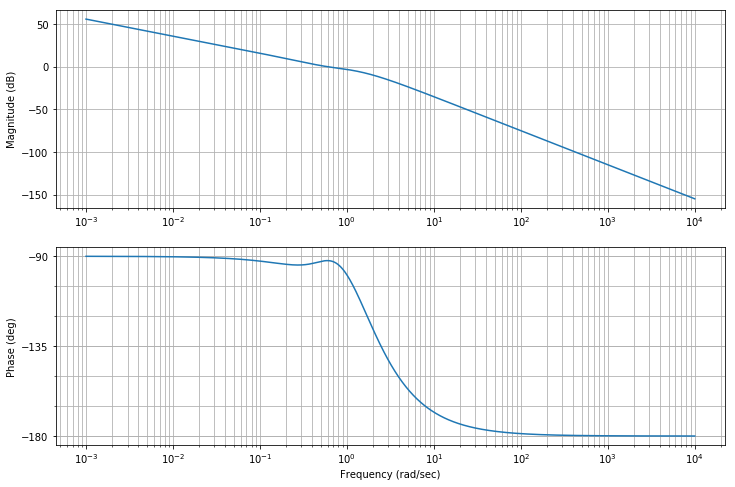

In [70]:
# Bode plot of the open loop
plt.figure(figsize=(12,8))
om = np.logspace(-3,4,1000)
Mag, Phase, omega = control.bode(G0, om,dB=True)

In [71]:
# stability margins
gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
gm_dB = 20*np.log10(gm)
gm_dB, pm

(inf, 87.81426827896132)

Increasing / decreasing $K_p$ results in an increase / decrease of the magnitude curve with $ 20 \log(K_p) $

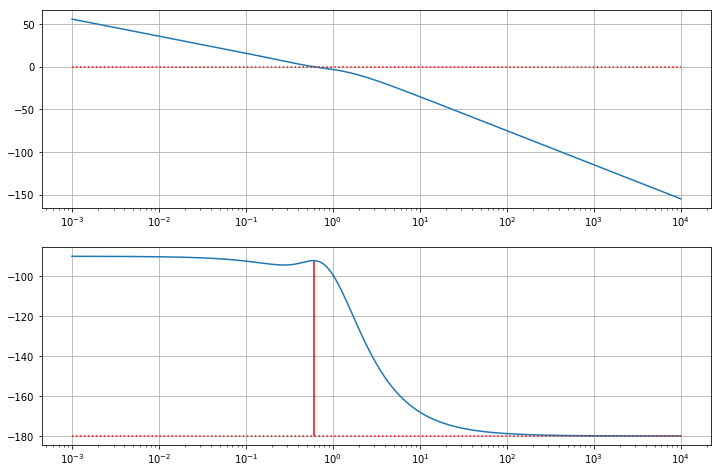

In [72]:
# plotting Bode with margin frequencies
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.semilogx(omega,20*np.log10(Mag)), plt.grid(True)
plt.semilogx(omega, 0*Mag,'r:')
plt.vlines(gc, -20*np.log10(gm), 0, colors='r')
plt.subplot(2,1,2)
plt.semilogx(omega,np.degrees(Phase)), plt.grid(True)
plt.semilogx(omega, 0*Phase - 180,'r:')
plt.vlines(pc, -180, -180 + pm, colors='r');

In [73]:
# time domain investigation
time = np.linspace(0,50,1000)
t, vt = control.step_response(G, time)

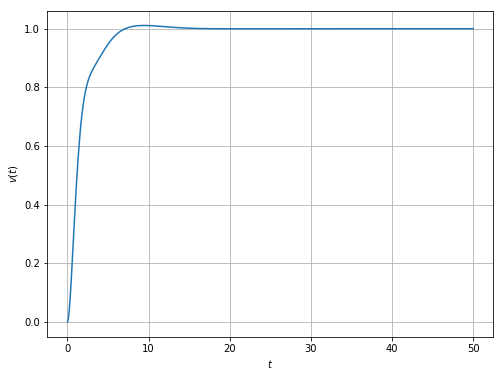

In [74]:
# plot the step response
plt.figure(figsize=(8,6))
plt.plot(t, vt), plt.grid(True), plt.xlabel('$t$'), plt.ylabel('$v(t)$');
#plt.xlim([22,28]);

Based on the step response we can read the value of $T_{crit}$.

In [75]:
Kpcrit = 4
Tcrit = 27.5 - 23.8
Kpcrit, Tcrit

(4, 3.6999999999999993)

In [76]:
# From tuning table
# [0.6, 0.5, 0.125]
# [0.33, 0.5, 0.33]
# [0.2, 0.5, 0.3]
Kp_tuned = 0.2 * Kpcrit
Ti_tuned = 0.5 * Tcrit
Td_tuned = 0.3 * Tcrit
Kp_tuned, Ti_tuned, Td_tuned

(0.8, 1.8499999999999996, 1.1099999999999997)

In [77]:
# info on transient behavior
control.step_info(G)

{'RiseTime': 3.559129817137629,
 'SettlingTime': 6.015703114835883,
 'SettlingMin': 0.9003437343372573,
 'SettlingMax': 1.0110647128748578,
 'Overshoot': 1.125946759990453,
 'Undershoot': 0.0,
 'Peak': 1.0110647128748578,
 'PeakTime': 9.439431254147625,
 'SteadyStateValue': 0.9998074136942233}